In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv(r"C:\Users\mflor\Desktop\data analysis projects\global super store dataset\Global_Superstore2.csv",
                encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [7]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

# Cleaning the data #

looking for missing data - how will we handle NaNs? 

locating duplicates



## Missing data ##

In [8]:
#how much data is missing per column?
for col in df.columns:
    percent_missing=100*np.mean(df[col].isnull())
    print('{}-{}%'.format(col, percent_missing))

Row ID-0.0%
Order ID-0.0%
Order Date-0.0%
Ship Date-0.0%
Ship Mode-0.0%
Customer ID-0.0%
Customer Name-0.0%
Segment-0.0%
City-0.0%
State-0.0%
Country-0.0%
Postal Code-80.51472021836615%
Market-0.0%
Region-0.0%
Product ID-0.0%
Category-0.0%
Sub-Category-0.0%
Product Name-0.0%
Sales-0.0%
Quantity-0.0%
Discount-0.0%
Profit-0.0%
Shipping Cost-0.0%
Order Priority-0.0%


The only missing data is in the postal code column - missing data will be ignored for now

## Duplicates ##

In [9]:
#no duplicates found
df.drop_duplicates()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [3]:
#display all of the columns
pd.set_option('display.max_columns', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## Changing data types ##

In [4]:
#change the discount column from float to int to make it easier to work with later
df['Discount'] = df['Discount']*100
df['Discount']= df['Discount'].astype('int64')
df['Discount']

0         0
1        10
2        10
3        10
4         0
         ..
51285     0
51286    80
51287     0
51288     0
51289     0
Name: Discount, Length: 51290, dtype: int64

what categories are the most popular?

what subcategory of each category is most popular?

when is ordering most common?

what is the most popular product?

what country sees the most shipment and gross?

what state sees the most shipments?

what states have the highest gross?

__is the freq of ordering higher when the customer has a discount?__

__does higher order priority correlate with the order price?__

__does a higher discount amount lead to increased profit?__

# Summary statistics #

In [13]:
#quick overview of categorical data
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [6]:
#target numerical features of the dataset (in order to exclude postal code, row number, etc)
target_numeric = df[['Profit','Sales','Shipping Cost','Quantity','Discount']]

In [6]:
target_numeric.describe()

,Profit,Sales,Shipping Cost,Quantity,Discount
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,28.610982,246.490581,26.375915,3.476545,14.288068
std,174.340972,487.565361,57.296804,2.278766,21.227999
min,-6599.978000,0.444000,0.000000,1.000000,0.000000
25%,0.000000,30.758625,2.610000,2.000000,0.000000
50%,9.240000,85.053000,7.790000,3.000000,0.000000
75%,36.810000,251.053200,24.450000,5.000000,20.000000
max,8399.976000,22638.480000,933.570000,14.000000,85.000000


array([[<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Shipping Cost'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount'}>, <Axes: >]], dtype=object)

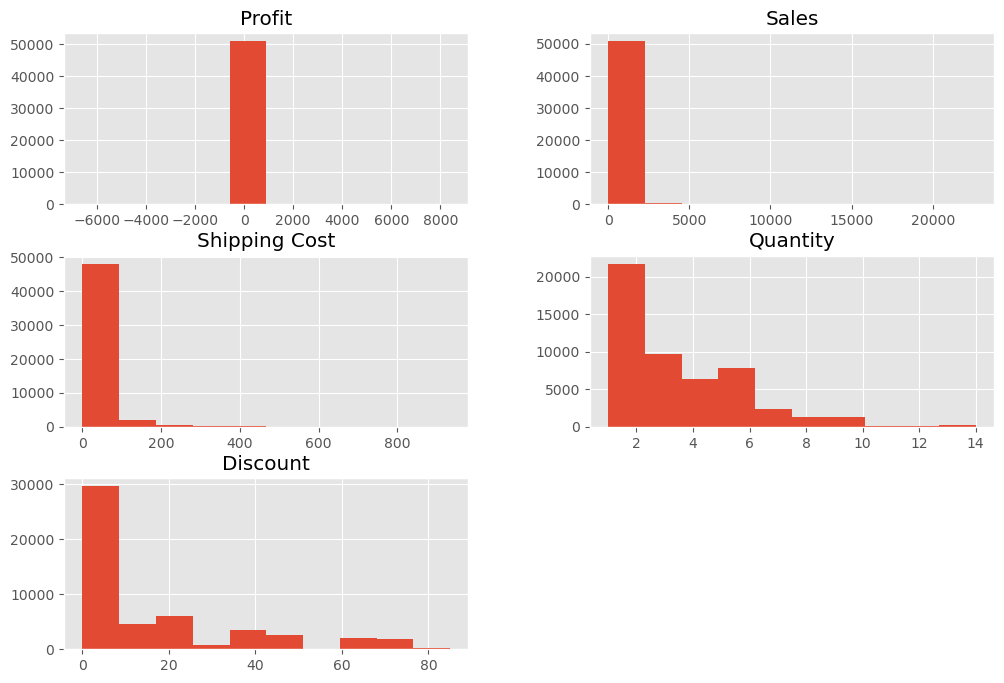

In [7]:
target_numeric.hist()

Text(0.5, 1.0, 'Sales Distribution')

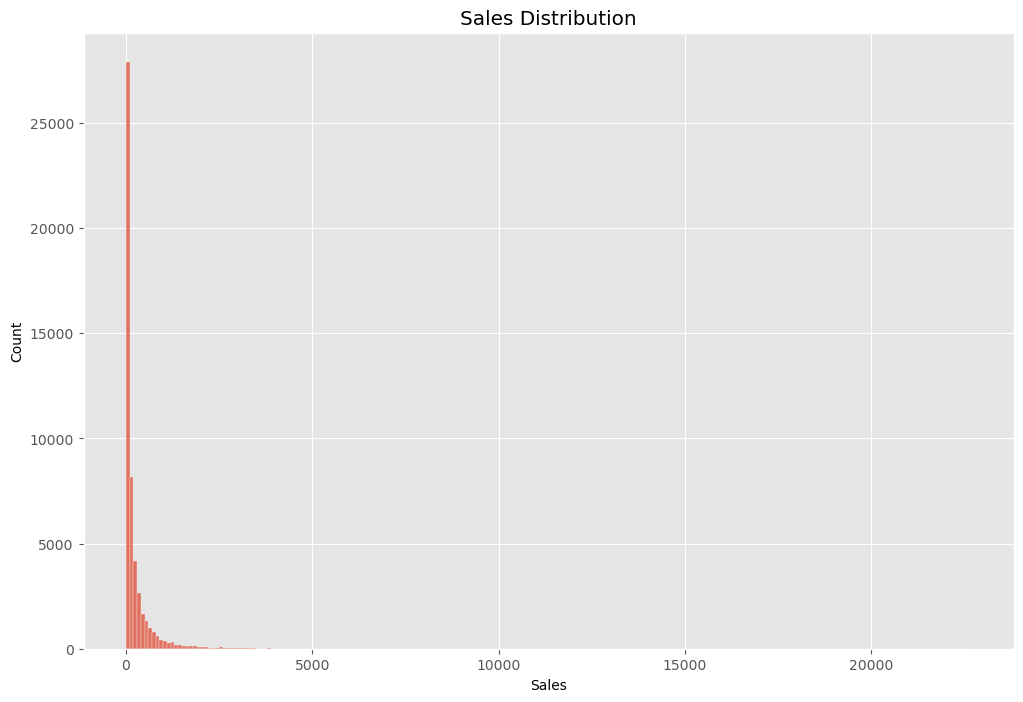

In [9]:
#distribution is skewed right
n = target_numeric['Sales'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Sales'])-min(target_numeric['Sales']))/math.sqrt(n)

sns.histplot(data=target_numeric['Sales'], bins=bins, binwidth=bin_width)
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Sales Distribution')

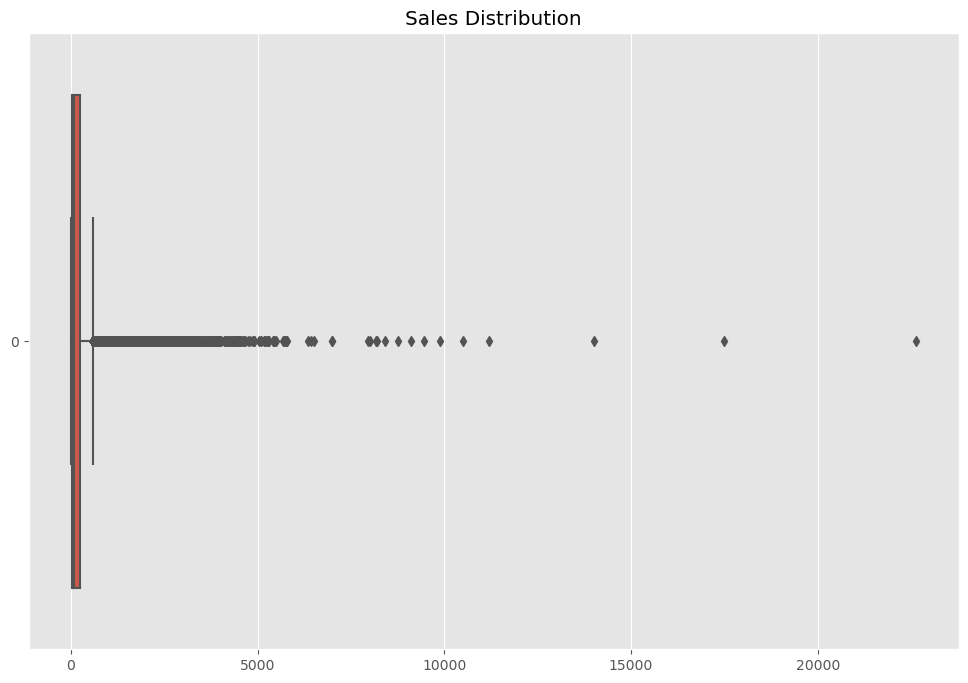

In [10]:
#there are many outliers but they will not be removed for this analysis
sns.boxplot(data=df['Sales'], orient='h')
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Profit Distribution')

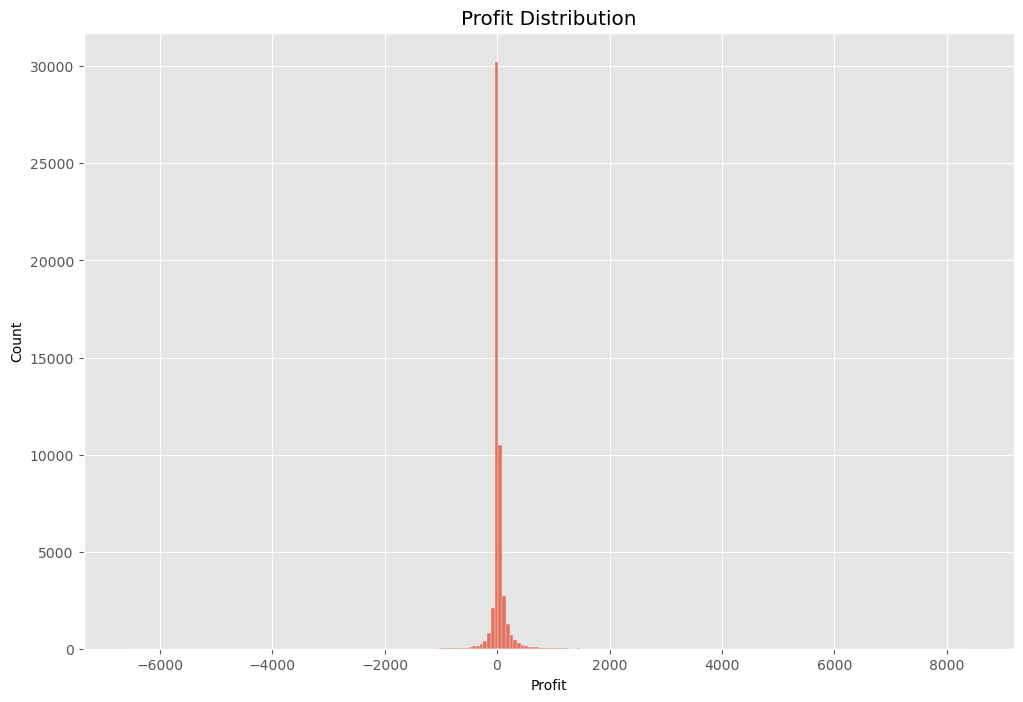

In [11]:
#distribution approximately normally distributed but seems to contain many outliers
n = target_numeric['Profit'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Profit'])-min(target_numeric['Profit']))/math.sqrt(n)

sns.histplot(data=target_numeric['Profit'], bins=bins, binwidth=bin_width)
plt.title('Profit Distribution')

Text(0.5, 1.0, 'Profit Distribution')

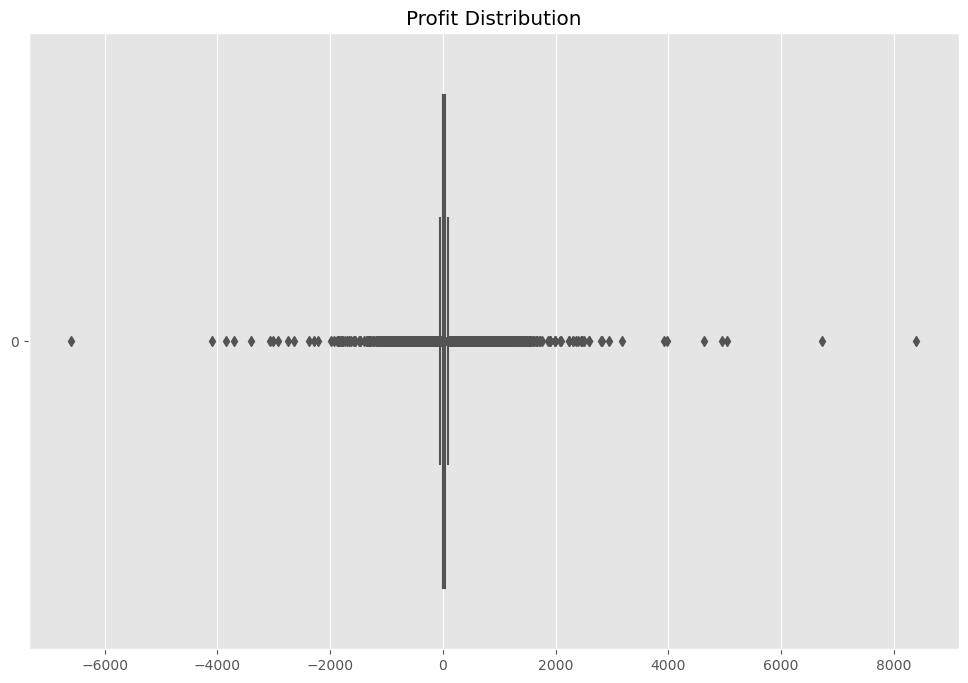

In [12]:
#there are many outliers but they will not be removed for this analysis
sns.boxplot(data=df['Profit'], orient='h')
plt.title('Profit Distribution')

# Metrics by the market #

<Axes: title={'center': 'Sales by market'}, xlabel='Market', ylabel='Sales'>

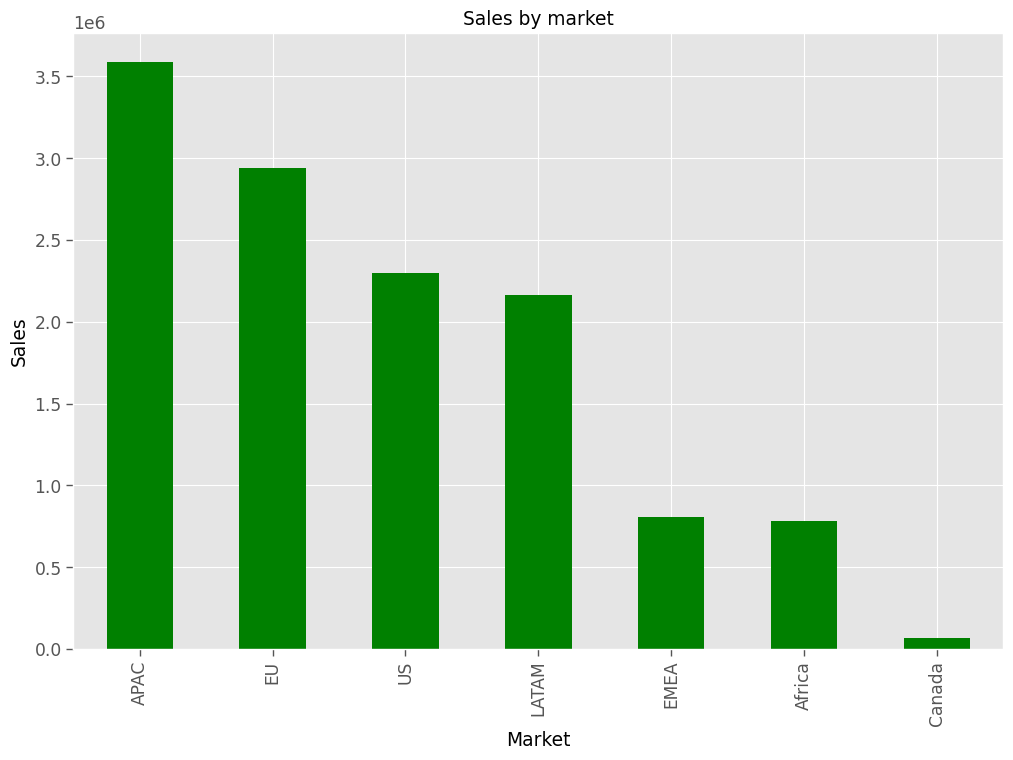

In [35]:
region_sales = df.groupby('Market')[['Sales']].sum().sort_values('Sales', ascending=False)
region_sales.plot(kind='bar', title='Sales by market', ylabel='Sales',legend=False, color='green')

<Axes: title={'center': 'Profit by market'}, xlabel='Market', ylabel='Profit'>

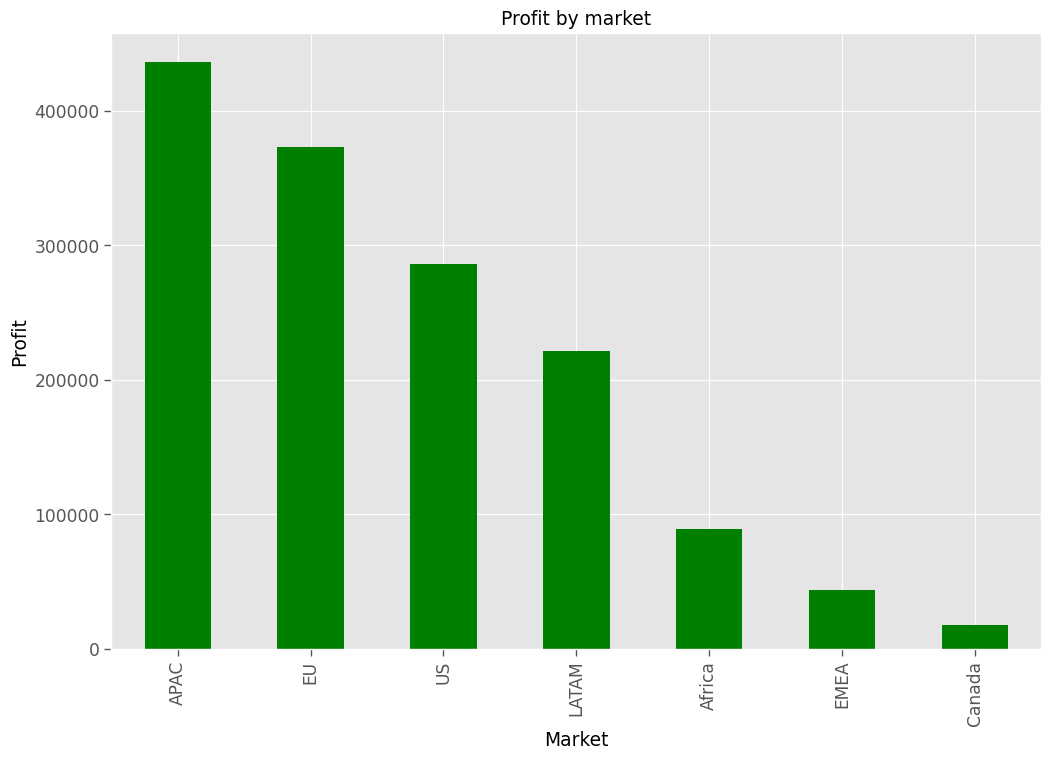

In [34]:
region_profit = df.groupby('Market')[['Profit']].sum().sort_values('Profit', ascending=False)
region_profit.plot(kind='bar', title='Profit by market',ylabel='Profit', legend=False,color='green')

<Axes: title={'center': 'Quantity sold by market'}, xlabel='Market', ylabel='Quantity'>

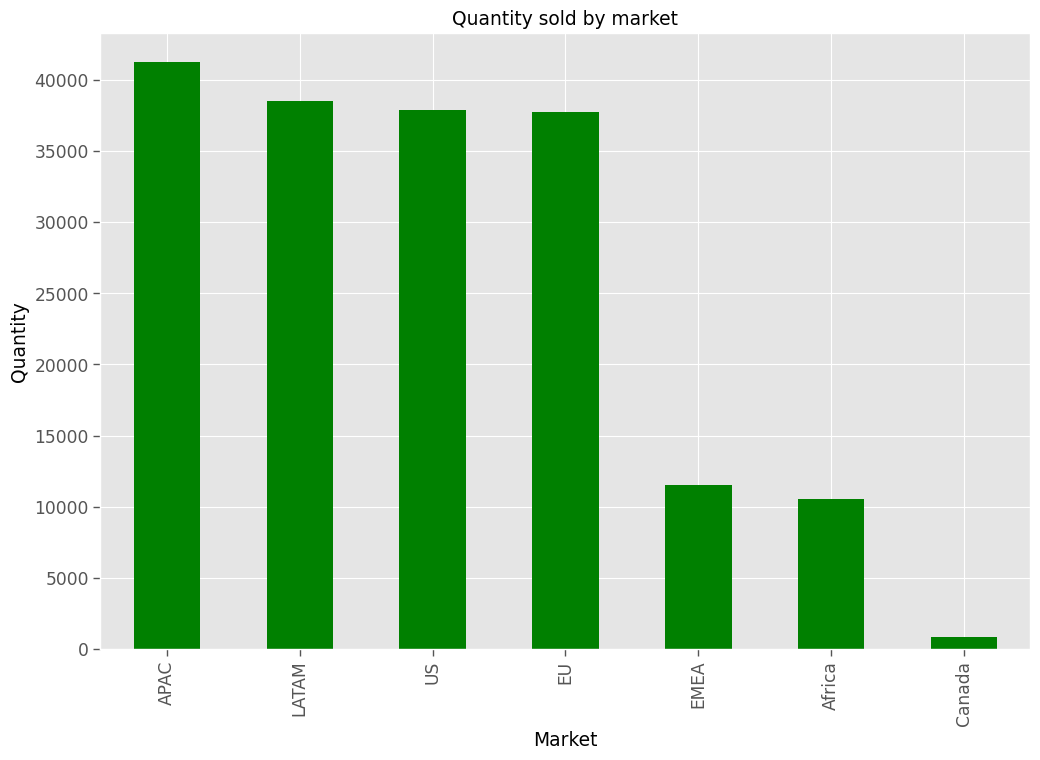

In [33]:
#quantity by region
region_quantity = df.groupby('Market')[['Quantity']].sum().sort_values('Quantity', ascending=False)
region_quantity.plot(kind='bar', title='Quantity sold by market', ylabel='Quantity',legend=False, color='green')

In [7]:
#21820 entries with discounts
discount_df = df[df['Discount'] > 0]
discount_df.shape

(21820, 24)

<Axes: title={'center': 'Distribution of Discounts'}, xlabel='Discount'>

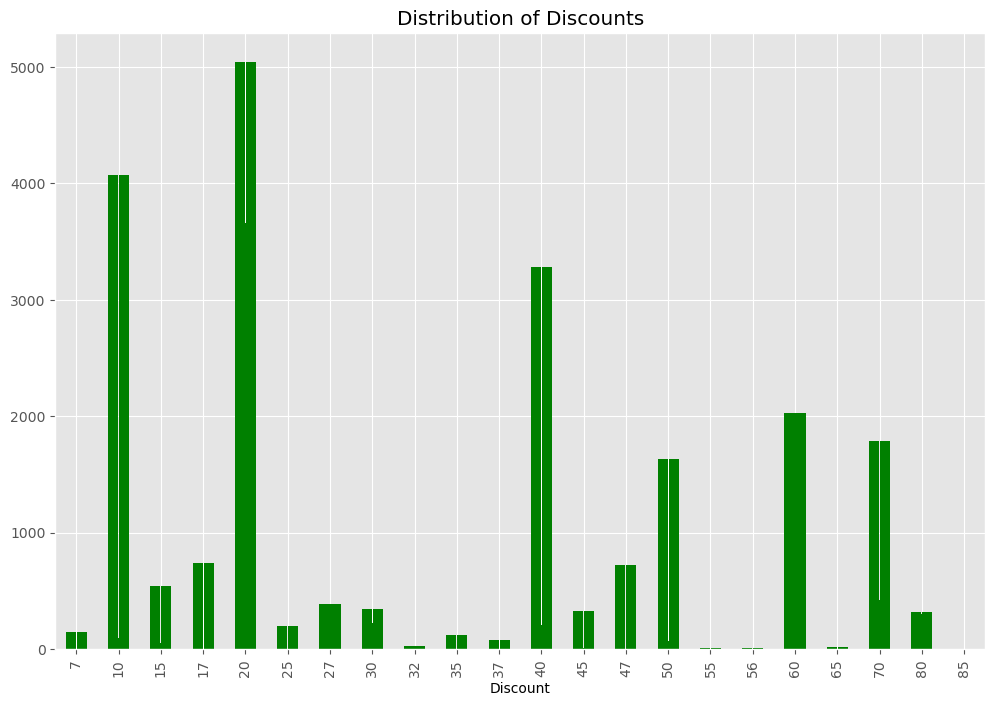

In [8]:
discounts = discount_df.groupby(by='Discount').count()
discounts.plot(kind='bar', color='green', legend=False, title='Distribution of Discounts')

# Metrics by category #

<Axes: title={'center': 'Categories ranked by profit'}, xlabel='Category', ylabel='Profit'>

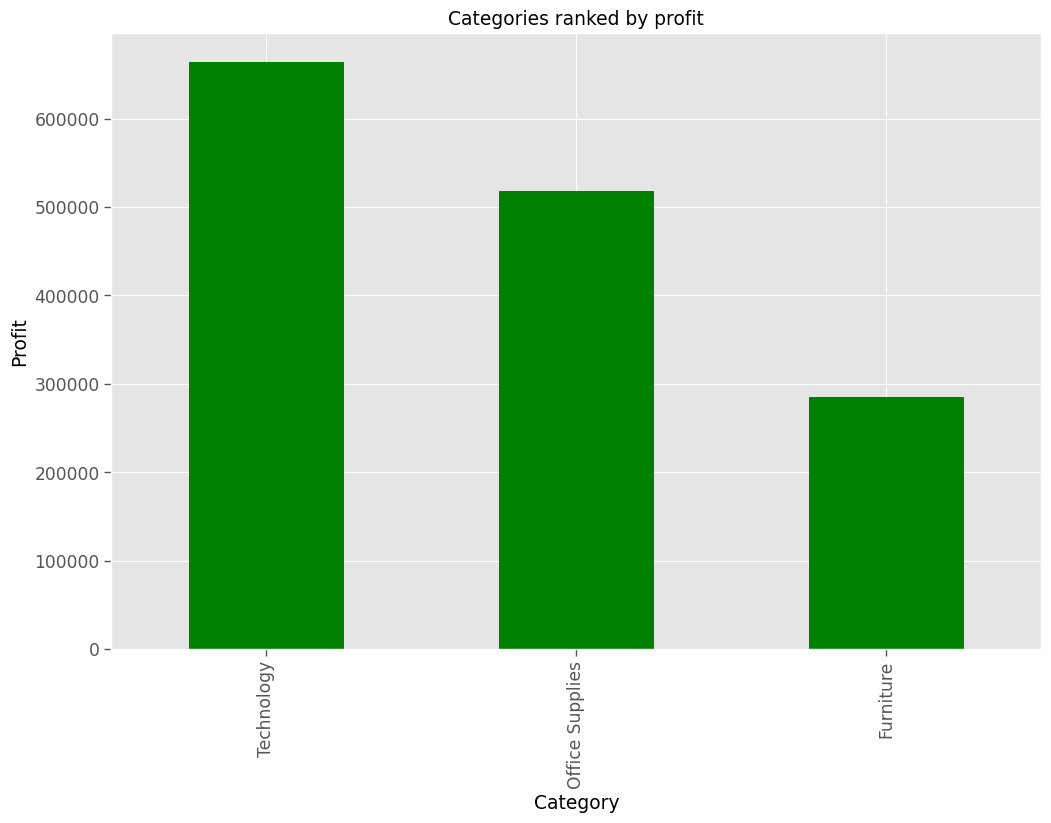

In [32]:
category_profit = df.groupby('Category')[['Profit']].sum().sort_values('Profit', ascending=False)
category_profit.plot(kind='bar', title='Categories ranked by profit', ylabel='Profit',legend=False, color='green')

<Axes: title={'center': 'Categories ranked by sales'}, xlabel='Category', ylabel='Sales'>

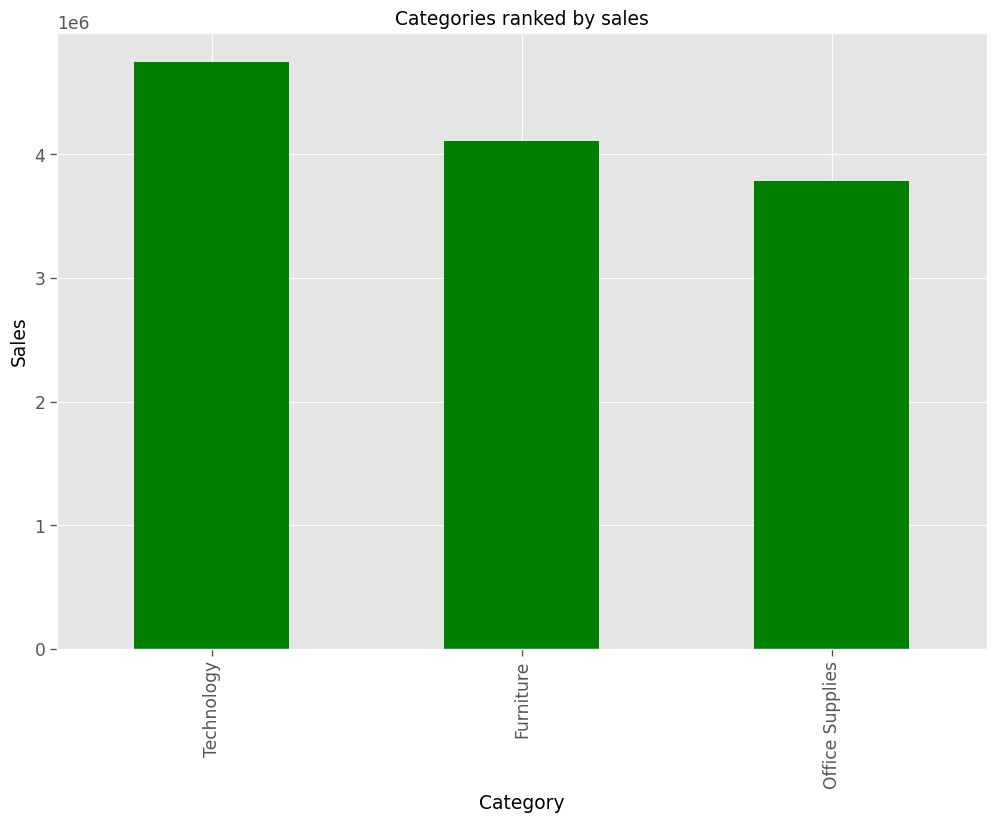

In [31]:
#categories
category_sales = df.groupby('Category')[['Sales']].sum().sort_values('Sales', ascending=False)
category_sales.plot(kind='bar', title='Categories ranked by sales', ylabel='Sales', legend=False, color='green')

# Shipping method vs sales #

Text(0.5, 1.0, 'Sales by Shipping Mode')

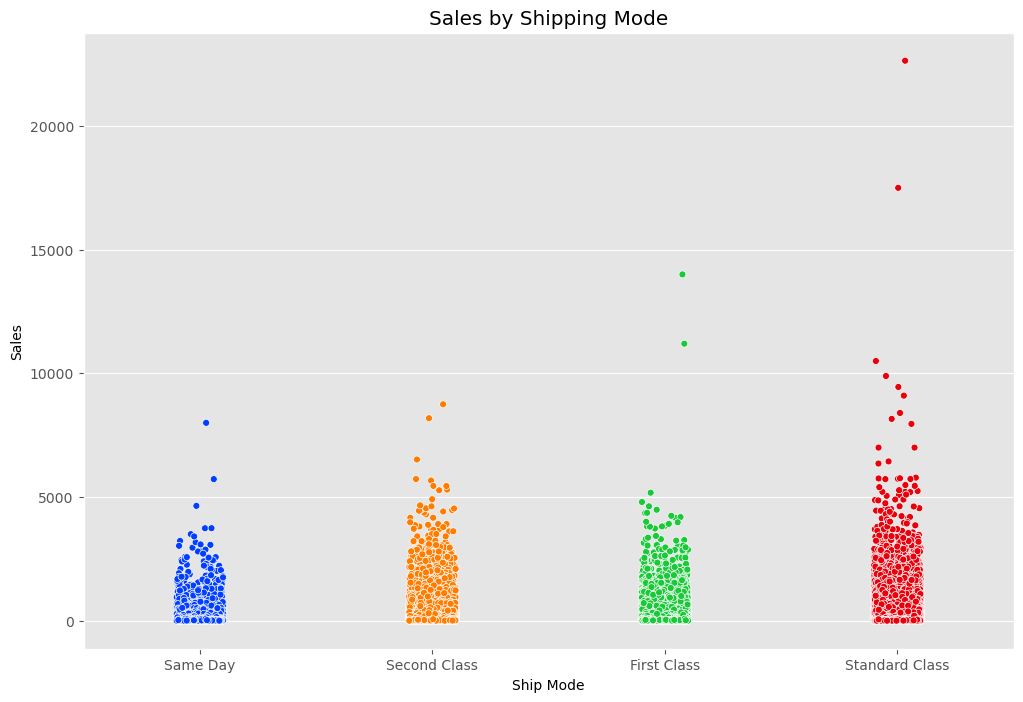

In [10]:
#strip plot of ship mode vs sales
sns.stripplot(x='Ship Mode', y='Sales',data=df, legend=False, jitter=True,
             linewidth=0.5,edgecolor='white', palette='bright', hue='Ship Mode')
plt.title('Sales by Shipping Mode')

# Correlations #

<Axes: >

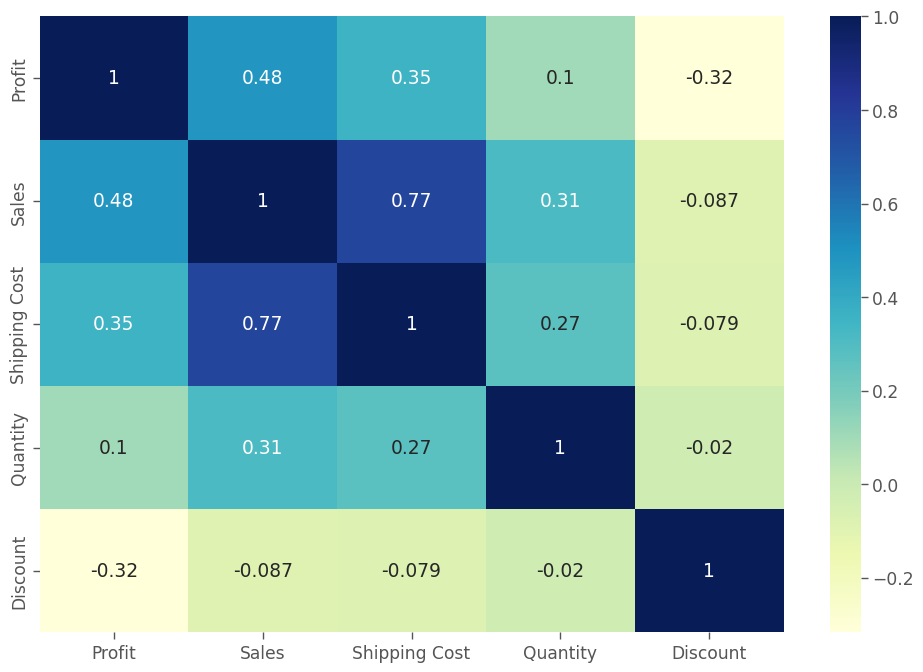

In [71]:
corr_mat= target_numeric.corr(numeric_only=True)
sns.heatmap(corr_mat, cmap='YlGnBu', annot=True)


# Correlations by market #

__What numerical features correlate with sales for each market that the super store services?__

In [11]:
#numerical features of interest and market
num_df = df[['Market','Profit','Sales','Shipping Cost','Quantity','Discount']].copy()

#creating dataframes for the unique markets to better understand them individually
APAC_df = num_df[num_df['Market'] == 'APAC']
LATAM_df = num_df[num_df['Market'] == 'LATAM']
EU_df = num_df[num_df['Market'] == 'EU']
US_df = num_df[num_df['Market'] == 'US']
EMEA_df = num_df[num_df['Market'] == 'EMEA']
Africa_df = num_df[num_df['Market'] == 'Africa']
Canada_df = num_df[num_df['Market'] == 'Canada']

## APAC ##

<Axes: >

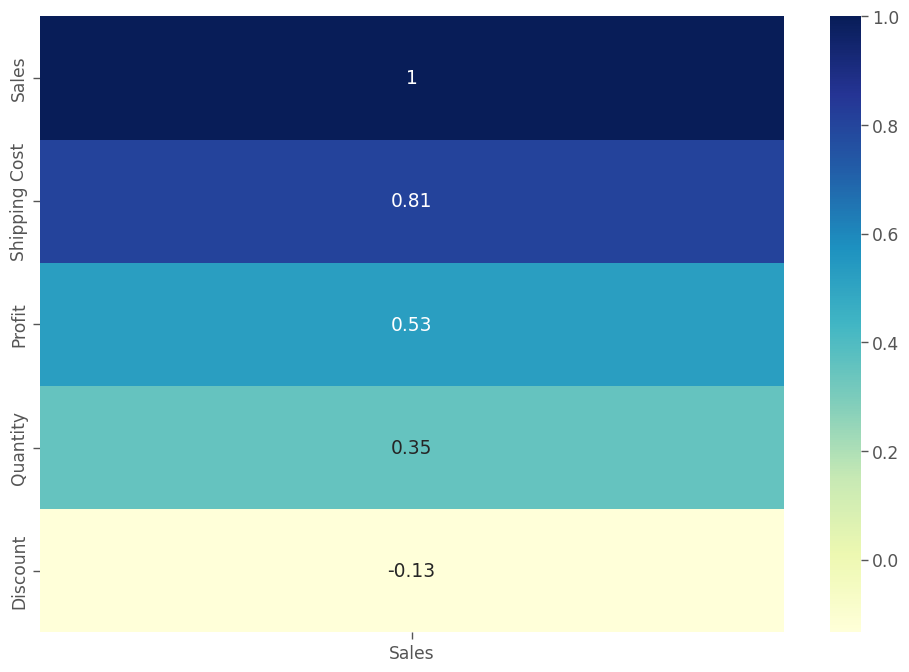

In [37]:
corr = APAC_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## LATAM ##

<Axes: >

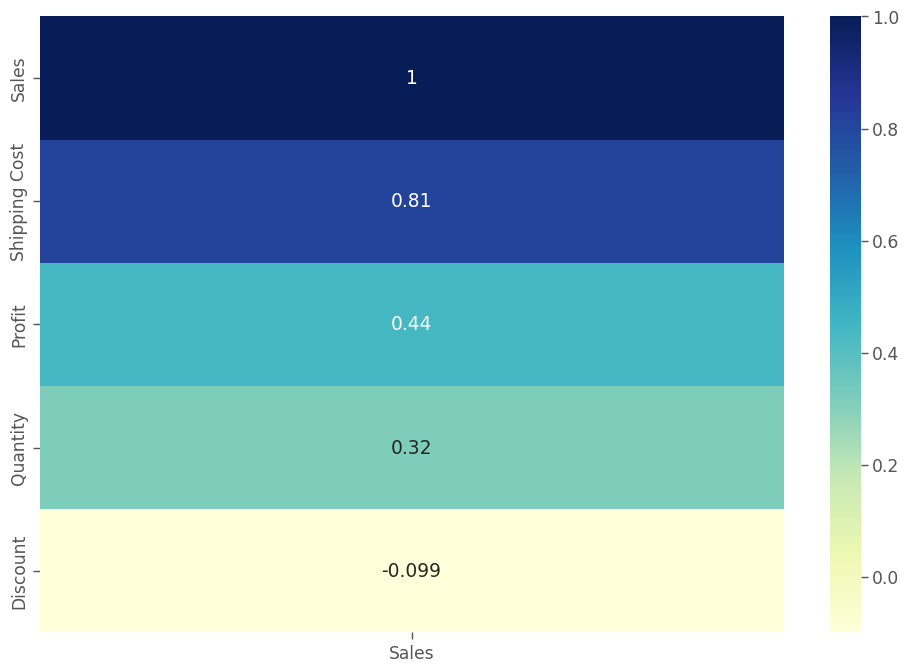

In [41]:
corr = LATAM_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## EU ##

<Axes: >

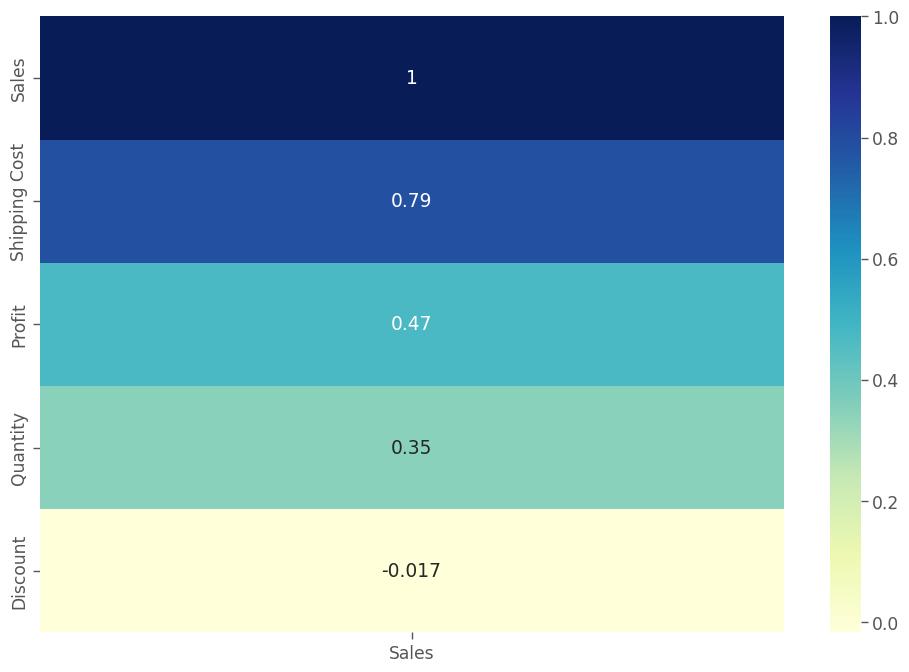

In [38]:
corr = EU_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## US ##

<Axes: >

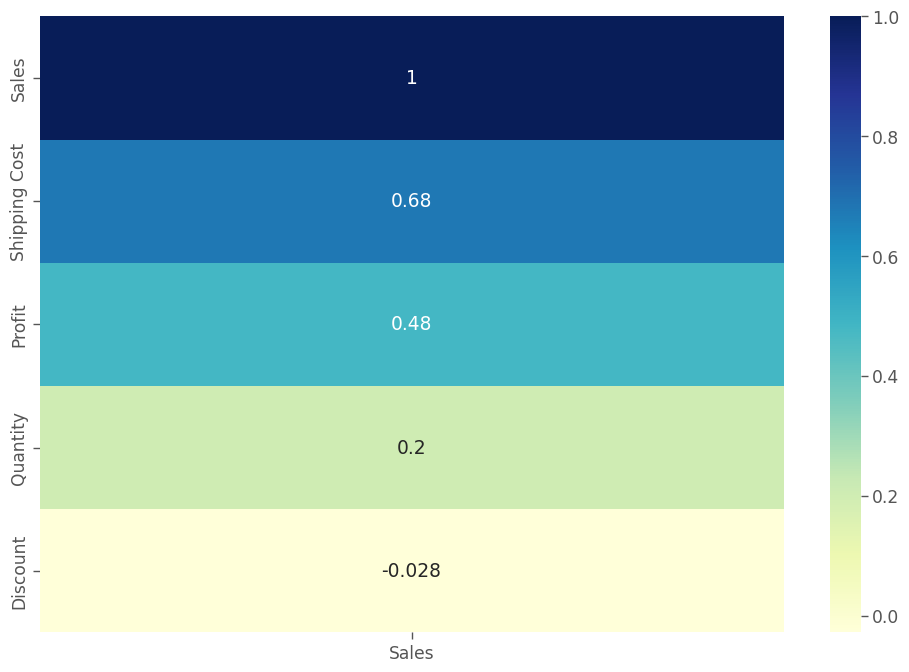

In [36]:
corr = US_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## EMEA ##

<Axes: >

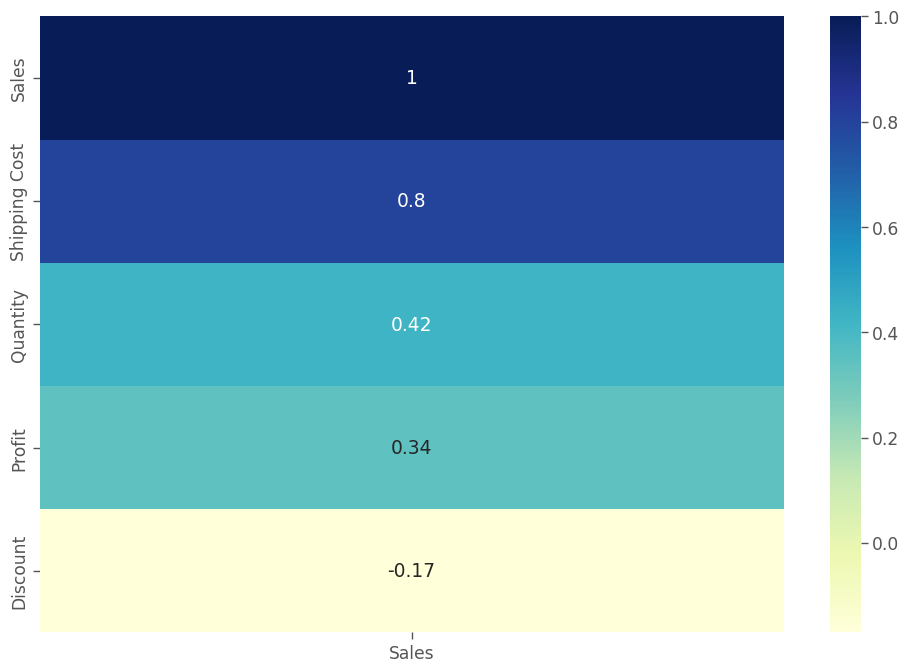

In [40]:
corr = EMEA_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## Africa ##

<Axes: >

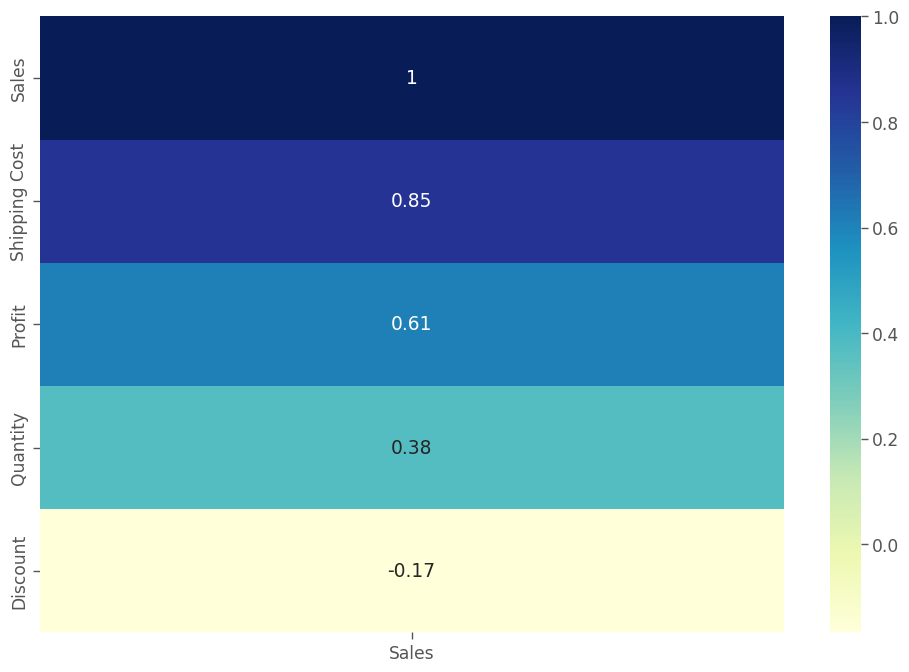

In [39]:
corr = Africa_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## Canada ##

<Axes: >

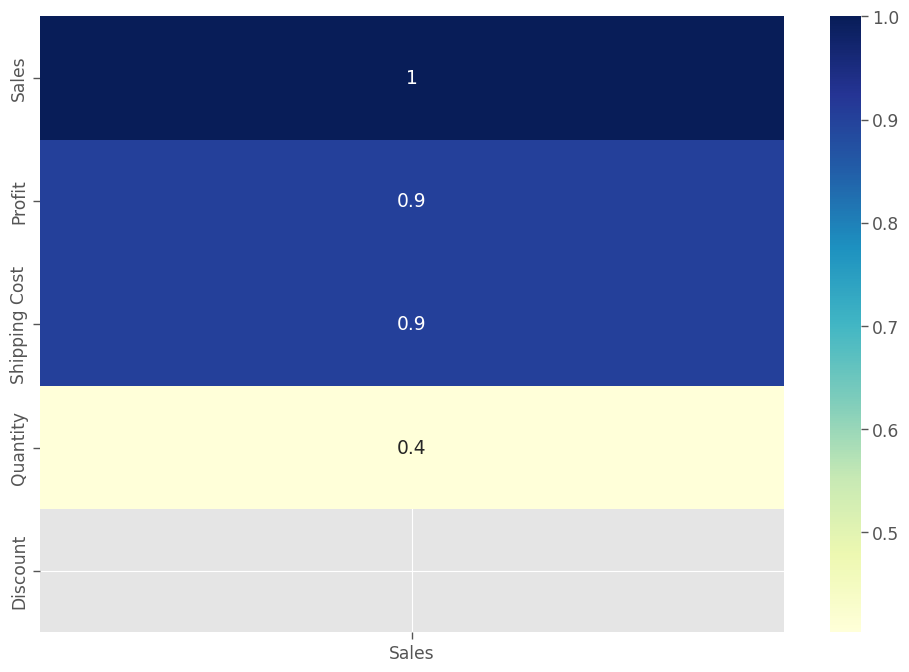

In [43]:
corr = Canada_df.corr(numeric_only=True)[['Sales']].sort_values(by='Sales', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

# Linear regression #

r^2: 0.2351455759464039


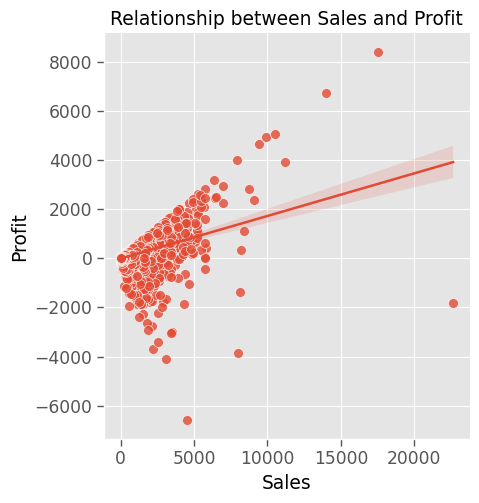

In [12]:
#sales vs profit
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Sales', y='Profit', data=df, scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})
r2 = (df['Sales'].corr(df['Profit']))**2
plt.title('Relationship between Sales and Profit')
print(f'r^2: {r2}')

Text(0.5, 1.0, 'Relationship between Sales and Profit by Market')

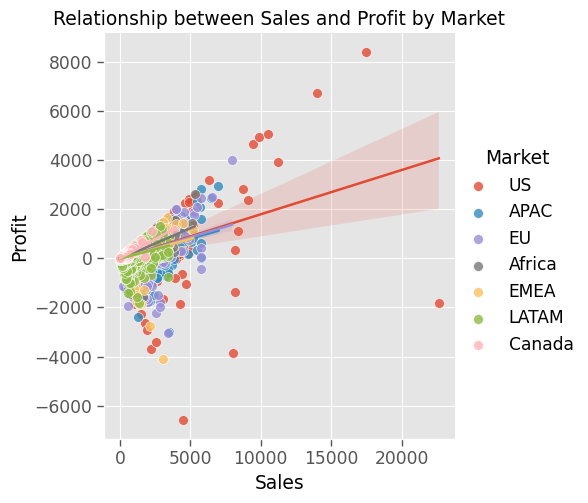

In [13]:
#x = sales y = profit
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Sales', y='Profit', data=df, hue='Market', scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})
plt.title('Relationship between Sales and Profit by Market')

In [66]:
print('R2 value by market:')
print()

for m in df['Market'].unique():
    c = (df[df['Market'] == m]['Sales'].corr(df[df['Market'] == m]['Profit']))**2
    print(f'{m}: {c}')

R2 value by market:

US: 0.2295026511896118
APAC: 0.27649395131146737
EU: 0.22339368474111618
Africa: 0.37173444903448144
EMEA: 0.11712238961585902
LATAM: 0.19163517773581354
Canada: 0.8168593354254352


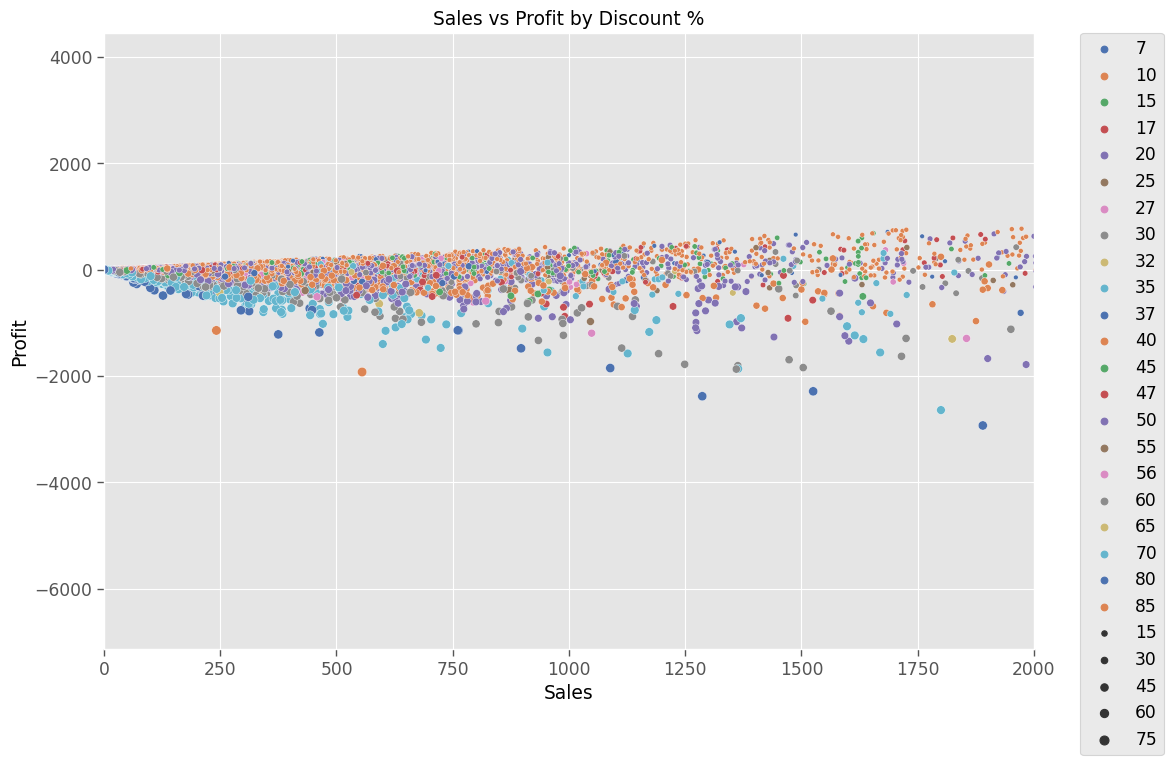

In [27]:
#sales vs profit with discount as both size and color
    #Sales 
fig, ax = plt.subplots()
ax.set_xlim(0, 2000)
sns.scatterplot(data=discount_df, x='Sales', y='Profit', size='Discount', hue='Discount', palette='deep')
plt.title('Sales vs Profit by Discount %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


<Figure size 2000x1500 with 0 Axes>

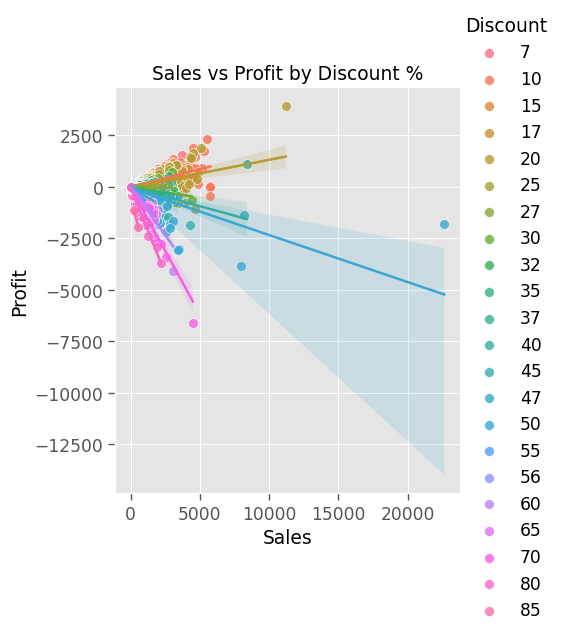

<Figure size 2000x1500 with 0 Axes>

In [26]:
#x = sales y = profit
#small discounts (less than ~25%) profit and sales likely trend upward
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Sales', y='Profit', data=discount_df, hue='Discount', 
               scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})
plt.title('Sales vs Profit by Discount %')
plt.figure(figsize=(20,15))

r^2: 0.5899358839955589


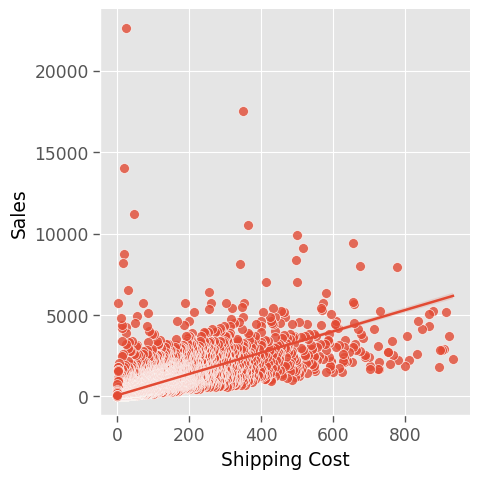

In [48]:
#shipping cost vs sales
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Shipping Cost', y='Sales', data=df, scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})

r2 = (df['Sales'].corr(df['Shipping Cost']))**2
print(f'r^2: {r2}')
plt.title('')

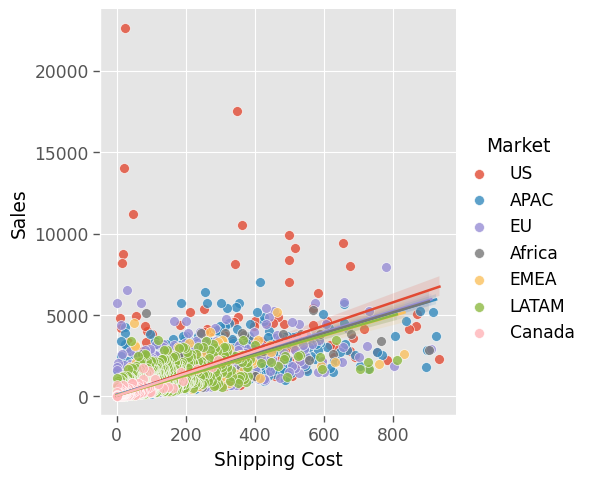

In [32]:
#shipping cost vs sales
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Shipping Cost', y='Sales', data=df, hue='Market', scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})

### R^2 value of Shipping Cost vs Sales by Region

In [67]:
print('R2 value by region:')
print()

for m in df['Market'].unique():
    c = (df[df['Market'] == m]['Sales'].corr(df[df['Market'] == m]['Shipping Cost']))**2
    print(f'{m}: {c}')

R2 value by market:

US: 0.4587062568992368
APAC: 0.6511467051405145
EU: 0.622890848865666
Africa: 0.724569071312708
EMEA: 0.6422833373254427
LATAM: 0.6513708788117981
Canada: 0.8166686039312523


r^2: 0.12562835267929534


Text(0.5, 1.0, 'Shipping cost vs Profit')

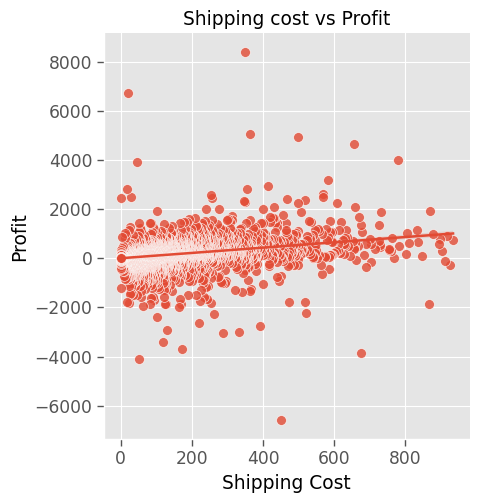

In [23]:
#shipping cost vs sales
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Shipping Cost', y='Profit', data=df, scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})

r2 = (df['Profit'].corr(df['Shipping Cost']))**2
print(f'r^2: {r2}')
plt.title('Shipping cost vs Profit')

Text(0.5, 1.0, 'Shipping Cost vs Profit by Market')

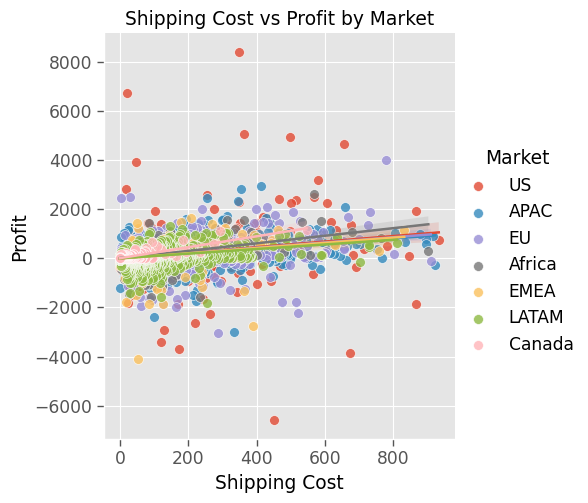

In [24]:
#shipping cost vs sales
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='Shipping Cost', y='Profit', data=df, hue='Market', scatter_kws={'s':50, 'linewidth': 0.5, 'edgecolor':'w'})
plt.title('Shipping Cost vs Profit by Market')

In [70]:
print('R2 value by market:')
print()

for m in df['Market'].unique():
    c = (df[df['Market'] == m]['Profit'].corr(df[df['Market'] == m]['Shipping Cost']))**2
    print(f'{m}: {c}')

R2 value by market:

US: 0.0802478375902987
APAC: 0.17023266858416017
EU: 0.1253513248578519
Africa: 0.25224261859748176
EMEA: 0.08597441706600815
LATAM: 0.1305755630490864
Canada: 0.7159897951632388


## Time series of order dates ##
__At what times of the year are people ordering things?__

In [125]:
df['Order Date']

0        31-07-2012
1        05-02-2013
2        17-10-2013
3        28-01-2013
4        05-11-2013
            ...    
51285    19-06-2014
51286    20-06-2014
51287    02-12-2013
51288    18-02-2012
51289    22-05-2012
Name: Order Date, Length: 51290, dtype: object

In [16]:
year = df['Order Date'].str[-4::]
month = df['Order Date'].str[3:5]
df['Year'] = year
df['Month'] = month
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount            int64
Profit            float64
Shipping Cost     float64
Order Priority     object
Year               object
Month              object
dtype: object

In [17]:
df_2011 = df[df['Year'] == '2011']
df_2012 = df[df['Year'] == '2012']
df_2013 = df[df['Year'] == '2013']
df_2014 = df[df['Year'] == '2014']

Text(0.5, 0.98, 'Number of Sales Over Time')

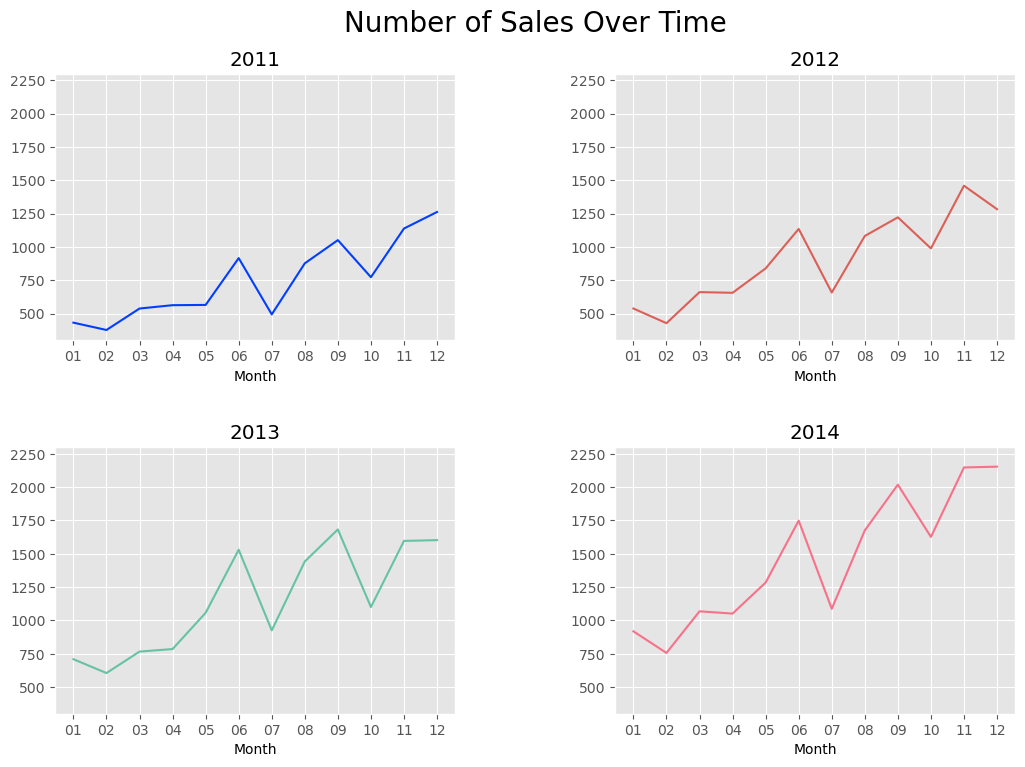

In [21]:
#number of sales 

fig, ax = plt.subplots(2,2)

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
date_group = df_2011.groupby('Month')[['Month']].count()
a = sns.lineplot(date_group, legend=False, palette='bright')
a.set_ylim(300,2300)

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
date_group = df_2012.groupby('Month')[['Month']].count()
b = sns.lineplot(date_group, legend=False, palette=sns.color_palette('hls',1))
b.set_ylim(300,2300)

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
date_group = df_2013.groupby('Month')[['Month']].count()
c = sns.lineplot(date_group, legend=False, palette=sns.color_palette('Set2',1))
c.set_ylim(300,2300)

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
date_group = df_2014.groupby('Month')[['Month']].count()
d = sns.lineplot(date_group, legend=False, palette=sns.color_palette('husl',1))
d.set_ylim(300,2300)

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('Number of Sales Over Time', fontsize=20)

Text(0.5, 0.98, 'Sales Amount Over Time')

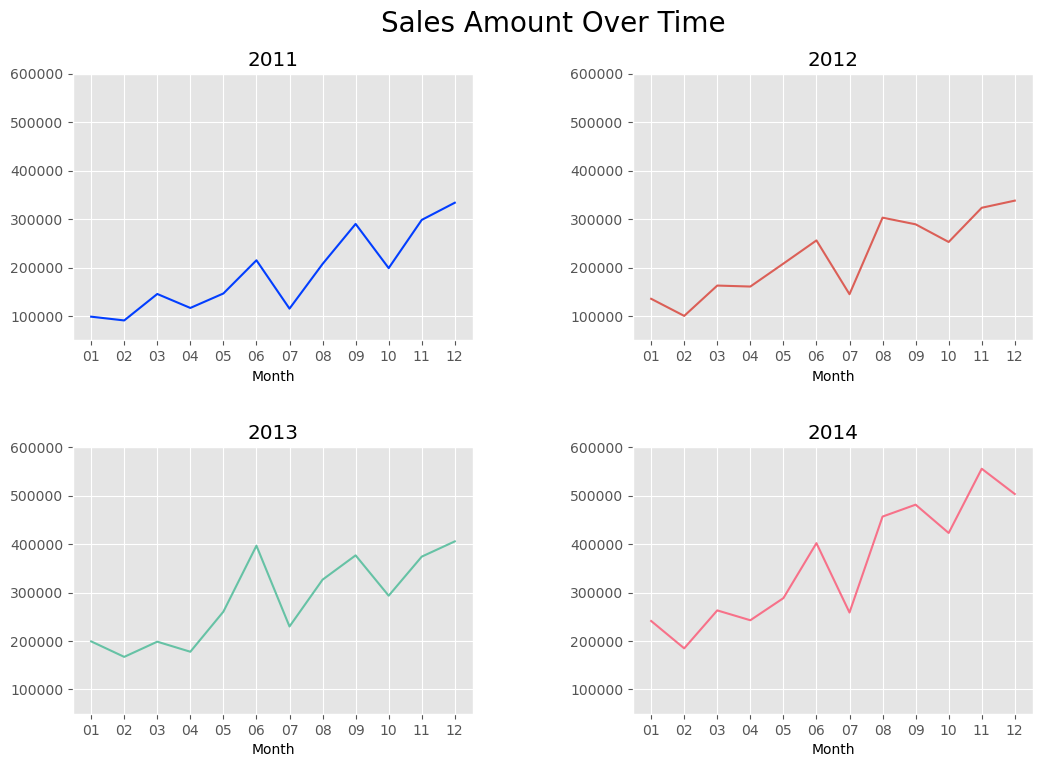

In [22]:
#when are overall sales the highest
fig, ax = plt.subplots(2,2)

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
date_group = df_2011.groupby('Month')[['Sales']].sum()
a = sns.lineplot(date_group, legend=False, palette='bright')
a.set_ylim(50000,600000)

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
date_group = df_2012.groupby('Month')[['Sales']].sum()
b = sns.lineplot(date_group, legend=False, palette=sns.color_palette('hls',1))
b.set_ylim(50000,600000)

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
date_group = df_2013.groupby('Month')[['Sales']].sum()
c = sns.lineplot(date_group, legend=False, palette=sns.color_palette('Set2',1))
c.set_ylim(50000,600000)

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
date_group = df_2014.groupby('Month')[['Sales']].sum()
d = sns.lineplot(date_group, legend=False, palette=sns.color_palette('husl',1))
d.set_ylim(50000,600000)

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle('Sales Amount Over Time', fontsize=20)

# T-test #

null hypothesis: discounts are not related to quantity purchased

In [15]:
# quantity vs discount
    #we accept the null hypothesis
print('discounted: ',df['Quantity'].mean())
print('population: ',discount_df['Quantity'].mean())
print()
print(stats.ttest_1samp(a=discount_df['Quantity'], popmean=df['Quantity'].mean()))
print()
print('lower quantile: ',stats.t.ppf(q=0.025, df=discount_df['Discount'].count()-1))
print('upper quantile: ',stats.t.ppf(q=0.975, df=discount_df['Discount'].count()-1))

discounted:  3.4765451355039967
population:  3.5695233730522458

TtestResult(statistic=6.053495063934375, pvalue=1.4405104449560552e-09, df=21819)

lower quantile:  -1.96007271548993
upper quantile:  1.9600727154899296


the p-value is less than 5% and the t statistic is outside of the quantiles of the t-distribution; therefore, we reject the null hypothesis.

# T test by region #

In [38]:
#regional data frames
APAC_df = df[df['Market'] == 'APAC']
EU_df = df[df['Market'] == 'EU']
US_df = df[df['Market'] == 'US']
LATAM_df = df[df['Market'] == 'LATAM']
Africa_df = df[df['Market'] == 'Africa']
EMEA_df = df[df['Market'] == 'EMEA']
Canada_df = df[df['Market'] == 'Canada']

#regional data frames for discounts
APAC_dis = APAC_df[APAC_df['Discount']>0]
EU_dis = EU_df[EU_df['Discount']>0]
US_dis = US_df[US_df['Discount']>0]
LATAM_dis = LATAM_df[LATAM_df['Discount']>0]
Africa_dis = Africa_df[Africa_df['Discount']>0]
EMEA_dis = EMEA_df[EMEA_df['Discount']>0]
Canada_dis = Canada_df[Canada_df['Discount']>0]

## Quantity vs discount ##

### APAC region 1 sample t-test ###

In [46]:
print('population mean: ', APAC_df['Quantity'].mean())
print('discounted mean: ', APAC_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=APAC_dis['Quantity'], popmean=APAC_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=APAC_dis['Quantity'].count()-1))

population mean:  3.747136884202872
discounted mean:  3.7578397212543555

TtestResult(statistic=0.37346628587586367, pvalue=0.7088139733079666, df=6313)

lower quantile -1.9603398309502422


the p value is over 5% and the t statistic lies within the upper and lower quantiles. For the APAC region, we accept the null hypothesis. There is no relation between the quantity sold and discounts.

### EU region 1 sample t-test ###

In [47]:
print('population mean: ', EU_df['Quantity'].mean())
print('discounted mean: ', EU_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=EU_dis['Quantity'], popmean=EU_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=EU_dis['Quantity'].count()-1))

population mean:  3.7773
discounted mean:  3.7563372995344024

TtestResult(statistic=-0.5964562384371523, pvalue=0.5509054120072535, df=3865)

lower quantile -1.9605779565123005


the p value is over 5% and the t statistic lies within the upper and lower quantiles. For the EU region, we accept the null hypothesis. There is no relation between the quantity sold and discounts.

### US region 1 sample t-test ###

In [41]:
print('population mean: ', US_df['Quantity'].mean())
print('discounted mean: ', US_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=US_dis['Quantity'], popmean=US_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=US_dis['Quantity'].count()-1))

population mean:  3.789573744246548
discounted mean:  3.77328714395689

TtestResult(statistic=-0.5285784762453812, pvalue=0.5971204747119512, df=5195)

lower quantile -1.9604207342292983


the p value is over 5% and the t statistic lies within the upper and lower quantiles. For the US region, we accept the null hypothesis. There is no relation between the quantity sold and discounts.

### LATAM region 1 sample t-test ###

In [42]:
print('population mean: ', LATAM_df['Quantity'].mean())
print('discounted mean: ', LATAM_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=LATAM_dis['Quantity'], popmean=LATAM_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=LATAM_dis['Quantity'].count()-1))

population mean:  3.7425684864969884
discounted mean:  3.7208256152421275

TtestResult(statistic=-0.6070373529352717, pvalue=0.5438626022213946, df=3778)

lower quantile -1.9605920995473156


the p value is over 5% and the t statistic lies within the upper and lower quantiles. For the LATAM region, we accept the null hypothesis. There is no relation between the quantity sold and discounts.

### Africa region 1 sample t-test ###

In [43]:
print('population mean: ', Africa_df['Quantity'].mean())
print('discounted mean: ', Africa_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=Africa_dis['Quantity'], popmean=Africa_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=Africa_dis['Quantity'].count()-1))

population mean:  2.303030303030303
discounted mean:  2.268939393939394

TtestResult(statistic=-0.5112524171183973, pvalue=0.6092812951204603, df=1055)

lower quantile -1.9622151209211915


the p value is over 5% and the t statistic lies within the upper and lower quantiles. For the African region, we accept the null hypothesis. There is no relation between the quantity sold and discounts.

### EMEA region 1 sample t-test ###

In [44]:
print('population mean: ', EMEA_df['Quantity'].mean())
print('discounted mean: ', EMEA_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=EMEA_dis['Quantity'], popmean=EMEA_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=EMEA_dis['Quantity'].count()-1))

population mean:  2.2901173195466296
discounted mean:  2.221876942200124

TtestResult(statistic=-1.3256647641045867, pvalue=0.1851390608669496, df=1608)

lower quantile -1.9614403698039593


the p value is over 5% and the t statistic lies within the upper and lower quantiles. For the EMEA region, we accept the null hypothesis. There is no relation between the quantity sold and discounts.

### Canada region 1 sample t-test ###

In [45]:
print('population mean: ', Canada_df['Quantity'].mean())
print('discounted mean: ', Canada_dis['Quantity'].mean())
print()
print(stats.ttest_1samp(a=Canada_dis['Quantity'], popmean=Canada_df['Quantity'].mean()))
print()
print('lower quantile', stats.t.ppf(q=0.025, df=Canada_dis['Quantity'].count()-1))

population mean:  2.1692708333333335
discounted mean:  nan

TtestResult(statistic=nan, pvalue=nan, df=-1)

lower quantile nan
